<a href="https://colab.research.google.com/github/pumkinni/book_study/blob/master/%ED%98%BC%EA%B3%B5_%EB%A8%B8_%EB%94%A5_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 모델 훈련
> 인공 신경망 모델을 훈련하는 모범 사례와 필요한 도구들을 살펴본 후 

> 이런 도구들을 다뤄 보면서 텐서플로와 케라스 API에 더 익숙해지기

#### 손실곡선

In [ ]:
# 데이터 생성 및 분류
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size =0.2, random_state = 42)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# 모델을 만드는 함수 생성
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# verbose : 훈련 과정 출력을 조절(기본값 1 : 진행 막대와 함께 손실등의 지표 출력, 2 : 진행 막대 빼고 출력, 0 : 훈련과정 나타내지 X)
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

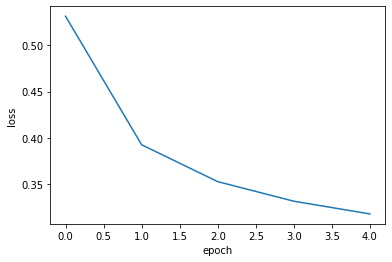

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

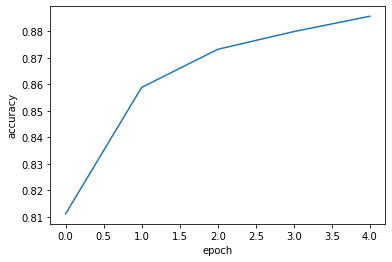

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Text(0, 0.5, 'loss')

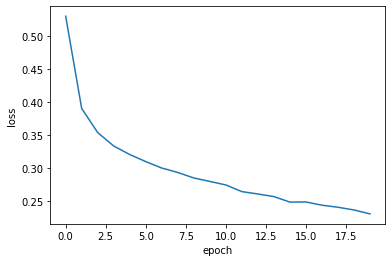

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs= 20, verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

#### 검증 손실
- 손실을 사용하여 과소/과대 적합 다루기

In [ ]:
# 검증 손실을 계산 하기위해 fit 메서드에 검증 데이터 튜플로 만들어 전달
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data=(val_scaled, val_target))

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

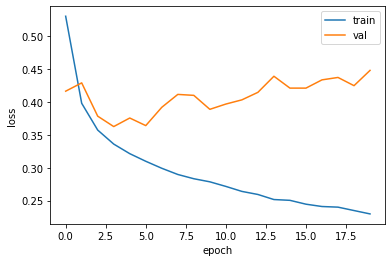

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

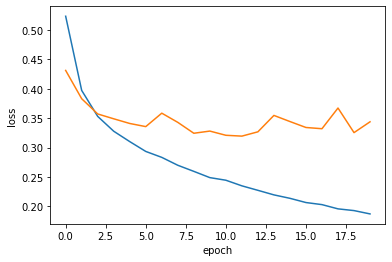

In [ ]:
# Adam 옵티마이저 적용(과대적합 줄이기)
model = model_fn()
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# 더 나은 손실 곡선을 위해서는 학습율을 조정

#### 드롭아웃
- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런의 출력을 0으로 만들어) 과대적합을 막음
-과대적합을 방지하는 이유
  > 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있음
  
  >  모든 입력에 대해 주의를 기울여야하여 더 안정적인 예측을 만들 수 있음

  > 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블 하는 것처럼 상상할 수  있음(앙상블은 과대적합을 막는 아주 좋은 기법)

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


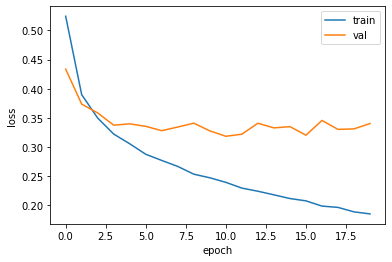

In [ ]:
model = model_fn()
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

모델 저장과 복원

In [ ]:
# 에포치를 10으로 다시 지정하여 모델 훈련
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0, validation_data = (val_scaled, val_target))

In [ ]:
# 훈련된 모델의 파라미터를 저장
model.save_weights('model-weights.h5')

In [ ]:
# 모델 구조와 모델 파라미터를 함께 저장
model.save('model-whole.h5')

In [ ]:
# 잘 저장되었는지 확인
!ls -al *.h5

-rw-r--r-- 1 root root 333448 May 12 16:01 model-weights.h5
-rw-r--r-- 1 root root 982664 May 12 16:01 model-whole.h5


In [ ]:
# 훈련하지 않은 새로운 모델을 만들고 이전에 저장했던 모델 파라미터를 적재
# load_weights() 매서드를 사용하려면 save_weoghts() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 함
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [ ]:
# 정확도 확인
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

0.8791666666666667


In [ ]:
# 모델 전체를 파일에서 읽은 후 검증 세트의 정확도 확인
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3322 - accuracy: 0.8792


[0.3322158455848694, 0.8791666626930237]

#### 콜백
- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
- keras.callbacks 패키지 아래에 있는 클래스들(fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용)
-ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만드는 모델을 저장

In [ ]:
# 모델을 훈련 후 best-model.h5에 최상의 검증 점수를 낸 모델이 저장
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target), callbacks=[checkpoint_cb])

In [ ]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3172 - accuracy: 0.8872


[0.31722673773765564, 0.8871666789054871]

#### 조기종료
- 과대적합이 시작되기 전에 훈련을 미리 중지하는 것
- EarlyStopping 콜백 
  > patience 매개변수 : 점수가 향상되지 않더라도 참을 에포크 횟수로 지정(patience = 2)
  
  > restore_best_weights = True : 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림

- EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용시
  > 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지 가능
  
  > 훈련을 중지 후 현재 모델의 파라미터를 최상의 파라미터로 되돌림 

In [ ]:
# 두 콜백 함께 사용
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)
model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
# 몇번째 에포치에서 멈췄는지 확인
early_stopping_cb.stopped_epoch

8

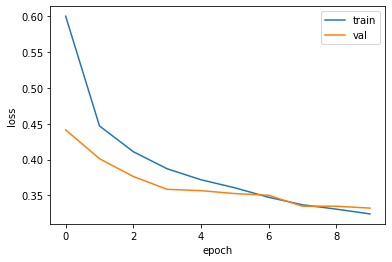

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3257 - accuracy: 0.8814


[0.3256588578224182, 0.8814166784286499]